IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA

In [44]:
vehicle_data=pd.read_csv(r"C:\Users\jayat\OneDrive\Documents\Vehicle Price.csv")

DEFINING CLASSIFICATION TARGET

In [45]:
y=vehicle_data['drivetrain']

DROPPING THE UNNECESSARY COLUMNS

In [46]:
vehicle_data = vehicle_data.drop(['name', 'description'], axis=1)

CHECKING FOR NULL VALUES

In [47]:
vehicle_data.isnull().sum()

make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

FILLING MISSING VALUES

In [49]:
vehicle_data['price'] = vehicle_data['price'].fillna(vehicle_data['price'].median())
vehicle_data['mileage'] = vehicle_data['mileage'].fillna(vehicle_data['mileage'].median())
vehicle_data['cylinders'] = vehicle_data['cylinders'].fillna(vehicle_data['cylinders'].median())
vehicle_data['doors'] = vehicle_data['doors'].fillna(vehicle_data['doors'].median())
vehicle_data['engine'] = vehicle_data['engine'].fillna(vehicle_data['engine'].mode()[0])
vehicle_data['transmission'] = vehicle_data['transmission'].fillna(vehicle_data['transmission'].mode()[0])
vehicle_data['exterior_color'] = vehicle_data['exterior_color'].fillna(vehicle_data['exterior_color'].mode()[0])
vehicle_data['interior_color'] = vehicle_data['interior_color'].fillna(vehicle_data['interior_color'].mode()[0])

In [50]:
vehicle_data.isnull().sum()

make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              7
mileage           0
transmission      0
trim              1
body              3
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

DROPPING MISSING VALUES

In [51]:
vehicle_data = vehicle_data.dropna()

In [52]:
categorical_cols = vehicle_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    vehicle_data[col] = le.fit_transform(vehicle_data[col])


In [53]:
vehicle_data.dtypes

make                int32
model               int32
year                int64
price             float64
engine              int32
cylinders         float64
fuel                int32
mileage           float64
transmission        int32
trim                int32
body                int32
doors             float64
exterior_color      int32
interior_color      int32
drivetrain          int32
dtype: object

In [54]:
convert_types = {
    'year': 'int64',
    'price': 'float64',
    'mileage': 'float64',
    'cylinders': 'float64',  # Use float for safety in case of NaNs
    'doors': 'float64',
    'interior_color': 'object',
    'exterior_color': 'object',
    'trim': 'object',
    'body': 'object',
    'transmission': 'object',
    'drivetrain': 'object'

}
vehicle_data = vehicle_data.astype(convert_types)

ENCODING CATEGORICAL FEATURES

In [55]:
categorical_cols = vehicle_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    vehicle_data[col] = le.fit_transform(vehicle_data[col])

SPLITING DATA INTO FEATURES AND TARGET

In [56]:
X = vehicle_data.drop('drivetrain', axis=1)
y = vehicle_data['drivetrain']

TRAIN-TEST-SPLIT

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FEATURE SCALING 

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TRAINING DATA


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        87
           1       0.71      0.61      0.66        64
           2       0.57      0.41      0.48        29
           3       0.75      0.32      0.44        19

    accuracy                           0.63       199
   macro avg       0.66      0.53      0.56       199
weighted avg       0.64      0.63      0.62       199



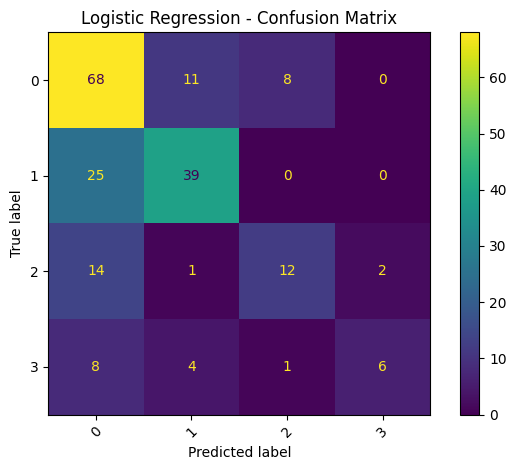


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        87
           1       0.91      0.94      0.92        64
           2       0.77      0.83      0.80        29
           3       0.67      0.63      0.65        19

    accuracy                           0.86       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.86      0.86      0.86       199



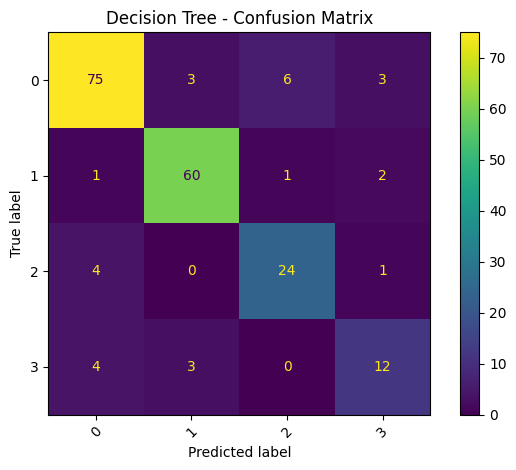


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        87
           1       0.97      1.00      0.98        64
           2       0.92      0.79      0.85        29
           3       1.00      0.63      0.77        19

    accuracy                           0.92       199
   macro avg       0.94      0.85      0.88       199
weighted avg       0.93      0.92      0.92       199



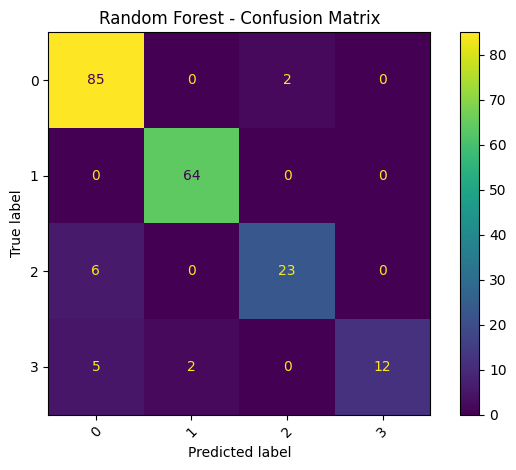


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        87
           1       0.83      0.83      0.83        64
           2       1.00      0.41      0.59        29
           3       1.00      0.37      0.54        19

    accuracy                           0.77       199
   macro avg       0.88      0.64      0.69       199
weighted avg       0.82      0.77      0.76       199



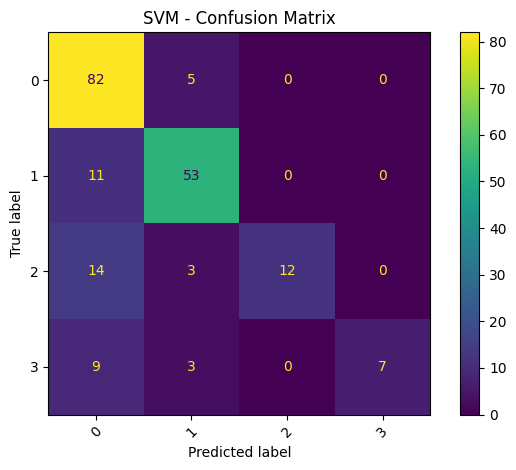


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        87
           1       0.80      0.86      0.83        64
           2       0.95      0.66      0.78        29
           3       0.90      0.47      0.62        19

    accuracy                           0.80       199
   macro avg       0.85      0.72      0.76       199
weighted avg       0.81      0.80      0.79       199



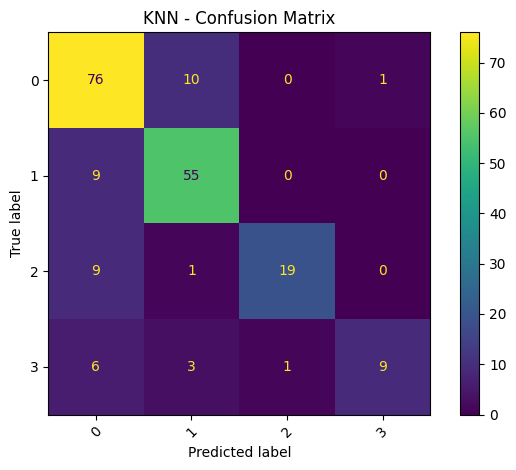

In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['weighted avg']
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

HYPERPARAMETER TUNING- RANDOM FOREST (EXAMPLE)

In [60]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
print("\nBest Random Forest Params:", grid_search.best_params_)


Best Random Forest Params: {'max_depth': 10, 'n_estimators': 100}


In [61]:
# Step 13: Hyperparameter Tuning - SVM (example)
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=5, scoring='f1_weighted')
random_search.fit(X_train, y_train)
print("\nBest SVM Params:", random_search.best_params_)


Best SVM Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [62]:
# Step 14: Final Model Comparison
final_results = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(final_results[['precision', 'recall', 'f1-score']])


Model Performance Summary:
                     precision    recall  f1-score
Logistic Regression   0.641441  0.628141  0.617529
Decision Tree         0.859189  0.859296  0.858880
Random Forest         0.928502  0.924623  0.920846
SVM                   0.816583  0.773869  0.756242
KNN                   0.812987  0.798995  0.793627


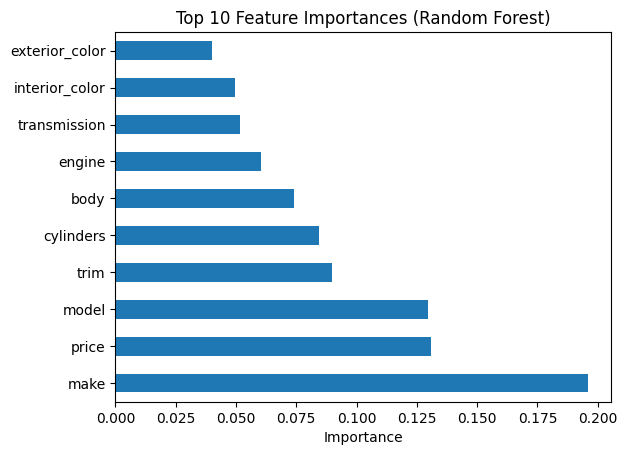

In [63]:
# Step 15: Feature Importance (Random Forest)
best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()